In [1]:
from __future__ import print_function

%matplotlib inline
%precision 16

from six.moves import range
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

Name: Vincent Zhao

# HW 4: Initial Value Problems

## Question 1 - Lotka-Volterra

Consider the following system of equations
$$\begin{aligned}
    \frac{dp}{dt} &= b_0 \cdot p - d_0 \cdot p \cdot v \\
    \frac{dv}{dt} &= b_1 \cdot p \cdot v - d_1 \cdot v
\end{aligned}$$
where the unknown functions are $r(t)$ and $f(t)$ and $b_i, d_i \in \mathbb R^+$.  This system is commonly known as the Lotka-Volterra equations which model a simple predator-prey population model.  For our purposes the function $p(t)$ represents the population of tourists at the newly opened Jurassic Park (prey) and $v(t)$ the velociraptor population (predators).  Here we are also allowing the birth $b_i$ and death $d_i$ coefficients to vary in time with
$$
    b(t) = \begin{bmatrix}
        0.05 \cos^3(3 t / \pi) \\ 
        0.01 \sin^3(t / \pi)
    \end{bmatrix} \quad \quad \text{and} \quad \quad 
    d(t) = \begin{bmatrix}
        0.02 \cos(2 t / \pi) \\ 
        0.1 \sin(4 t / \pi)
    \end{bmatrix}
$$

**(a)** [5] Find the Jacobian of $f(t, u)$ and write a function that computes $f$ and the Jacobian $J$ given a $t$ and $u$.  Do not use `sympy` to write the Jacobian function although you can use it to check your answer.  We have provide the birth and death rate functions.

**Answer to Question 1 (a)**

We can rewrite the system of equations as:

$$\frac{d}{dt} \begin{bmatrix} p \\ v \end{bmatrix} = \begin{bmatrix} b_0p- d_0pv \\ b_1pv - d_1v \end{bmatrix} = \vec{f}(t, b, d, p, v)$$

If we want to write something fancy with corresponding with the $f(t, U)$ function below, we can replace $p$ and $v$ by $U$. Then $\vec{f}(t, b, d, p, v)$ will be $\vec{f}(t, b, d, U)$

If we want to calculate the Jacobian $J$, we then need to take the partial derivative of the function above wrt $p(t)$ and $v(t)$. Then we can have something below:

$$
    J(t,u) = \begin{bmatrix}
        b_{0}-d_{0}v & -d_{0}p\\ 
        b_{1}v & b_{1}p-d_{1}
    \end{bmatrix}
$$

In [2]:
def birth_rates(t):
    return numpy.array([0.05 * numpy.cos(t * 3.0 / numpy.pi)**3, 
                        0.01 * numpy.sin(t       / numpy.pi)**3])

def death_rates(t):
    return numpy.array([0.02 * numpy.cos(t * 2.0 / numpy.pi), 
                        0.10 * numpy.sin(t * 4.0 / numpy.pi)])

def f(t, U):
    """Right hand side of system."""
    
    bs, ds = birth_rates(t), death_rates(t)
    
    answer = numpy.array([bs[0] * U[0] - ds[0] * U[0] * U[1],
                         bs[1] * U[0] * U[1] - ds[1] * U[1]])

    return answer

def J(t, U):
    """Compute the Jacobian of the function f(t,u)"""
    
    bs, ds = birth_rates(t), death_rates(t)
    
    answer = numpy.array([[bs[0] - ds[0] * U[1], -ds[0] * U[0]], 
                          [bs[1] * U[1], bs[1] * U[0] - ds[1]]])
    
    return answer

In [3]:
t = 1.0
U = numpy.array([32.0, 5.1])
f_solution = numpy.array([-2.316188606456715 , -0.4375625749832442])
numpy.testing.assert_allclose(f(t, U), f_solution)
J_solution = numpy.array([[-0.0723808939517723, -0.5146302900664267], [ 0.0015633065704327, -0.0857965833300479]])
numpy.testing.assert_allclose(J(t, U), J_solution)
print("Success!")

Success!


**(b)** [5] Use `scipy.integrate` to solve the system using the function you wrote above.

In [4]:
import scipy.integrate as integrate

def solve_scipy(t, U_0):
    """Solve the system using scipy.integrate"""
    U = numpy.empty((t.shape[0],2))
    U[0, :] = U_0
    
    integrator = integrate.ode(f)
    integrator.set_integrator("dopri5")
    integrator.set_initial_value(U[0, :])

    for (n, t_n) in enumerate(t[1:]):
        integrator.integrate(t_n)
        if not integrator.successful():
            break
        U[n+1, :] = integrator.y
    return U

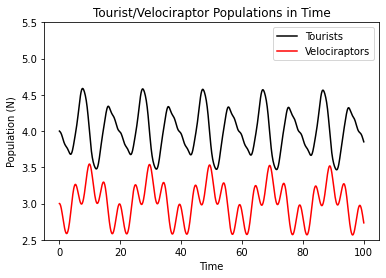

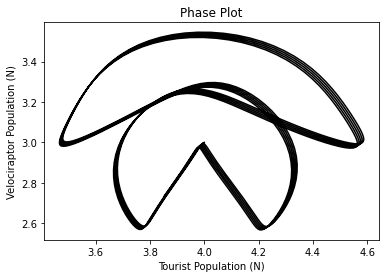

Success


In [5]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_scipy(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.0,  3.0],
                      [ 3.9279172294167317,  3.5408818585097022],
                      [ 3.9830673083618886,  2.980274473969855 ],
                      [ 3.8004716403312524,  3.5000374537033361],
                      [ 3.9585778183108209,  2.9333231345441941],
                      [ 3.6950925707002193,  3.4300538999244909],
                      [ 3.9234384730566925,  2.8657982222073044],
                      [ 3.6145728074599934,  3.3401620269783758],
                      [ 3.8810111262801268,  2.7871140670350409],
                      [ 3.5554505511662997,  3.2417027488327261]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

**(c)** [8] Consider the case where we wanted to use an implicit method, in this case backward Euler.  Since the function $f(t, u)$ is non-linear we must make some approximation to find the solution to the problem.  In the first case take the resulting ODE discretization and use a Taylor expansion of $f(t, u)$ about $(t^n, u(t^n))$ to find a new linear system that can be inverted to find the solution.  Write down this update scheme explicitly.

Hint: The eventual expression should be up to $\mathcal{O}(\Delta t)$.  Any higher order terms in $\Delta t$ can be dropped.

**Answer to Question 1 (c)**

We can apply Taylor series on $f(t,u)$ about $t^n, u(t^n)$:

$$
\begin{aligned}
f(t, u) = f(t^n, u(t^n)) + J_f(t^n, u(t^n))[u - u(t^n)] + \Delta t \frac{\partial f}{\partial t} + \mathcal{O}(\Delta t)
\end{aligned}
$$

Simply substitute $(t^{n+1}, u(t^{n+1}))$:

$$
u(t^{n+1}) = u(t^n) + \Delta t \left(f(t^n, u(t^n)) + \Delta t \frac{\partial f}{\partial t} + J_f(t^n, u(t^n))[u_{n+1} - u(t^n)]  \right)
$$

$$
= u(t^n) + \Delta t f(t^n, u(t^n)) + \Delta t^2 \frac{\partial f}{\partial t} + \Delta t J_f(t^n, u(t^n))[u(t^{n+1}) - u(t^n)]
$$

$$
\approx u(t^n) + \Delta t f(t^n, u(t^n)) + \Delta t J_f(t^n, u(t^n))[u(t^{n+1}) - u(t^n)]
$$

Then, we can get something interesting as below and get $u(t^{n+1})$ by multiplying $(I - \Delta t J_f(t^n, u(t^n)))^{-1}$:

$$
\begin{aligned}
(I - \Delta t J_f(t^n, u(t^n)))(u(t^{n+1})) &= u(t^n) + \Delta t (f(t^n, u(t^n)) -  J_f(t^n, u(t^n))(u(t^n)))\\
u(t^{n+1}) &= (I - \Delta t J_f(t^n, u(t^n)))^{-1} \cdot (u(t^n) + \Delta t (f(t^n, u(t^n)) -  J_f(t^n, u(t^n))(u(t^n))))
\end{aligned}
$$


**(d)** [7] Write a function that computes the solution to the linearized system of equations from part (c) using the backward Euler method.  You may use `numpy.linalg.solve`.

In [6]:
def solve_linearization(t, U_0):
    """Solve the Tourist/Velociraptor problem using a linearization"""
    
    U = numpy.empty((t.shape[0], 2))
    U[0, :] = U_0
    delta_t = t[1] - t[0]
    
    for n, t_n in enumerate(t[1:]):
        ja = J(t_n - delta_t, U[n, :])
        A = numpy.eye(U_0.shape[0]) - (delta_t * ja)
        b = U[n, :] + delta_t * (f(t_n - delta_t, U[n, :]) - numpy.dot(ja, U[n, :]))
        U[n+1, :] = numpy.linalg.solve(A, b)
    
    
    return U

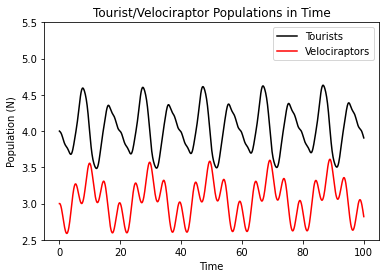

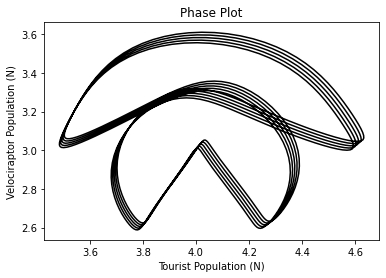

Success


In [7]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_linearization(t, numpy.array([4.0, 3.0]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9562704025807616,  3.5550168469660899],
                      [ 3.9946656738865847,  3.0008012236746606],
                      [ 3.8363199595503161,  3.5396965282316728],
                      [ 3.9822873402068408,  2.9733440899499959],
                      [ 3.7357914034866888,  3.4934127671296538],
                      [ 3.9586406842928703,  2.9233357150626329],
                      [ 3.6590999818099319,  3.424489869445619 ],
                      [ 3.9260233789064363,  2.8596477917259606],
                      [ 3.6040049623838342,  3.3438868112108282]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

**(e)** [8] Again consider the use of backward Euler on the above system.  Now apply Newton's method to solve the system.  Formulate the approach mentioned writing down the eventual system of linear equations that need to be solved.  Make sure to explicitly write down this system.

**Answer to Question 1 (e)**

We apply backward Euler again on the system

$$
\begin{aligned}
f(u(t^{n+1})) &= u(t^{n+1}) - u(t^n) - \Delta t f(t^{n+1}, u(t^{n+1}))\\
&= 0
\end{aligned}
$$

Then the Newton's method on $f$ can be expressed as below:

$$
u(t^{n+1}) = u(t^n) - \frac{f(u(t^n))}{\nabla_{u} f(u(t^n))}
$$

We then apply the algorithm learned from class 4300 lol:

### Algorithm

1. Initialize $x = x_0$
1. While ( $f(x) > tol$ )
  - solve $\delta = -f(x)/f'(x)$
  - update $x \leftarrow x + \delta$

But if we want to solve the problem we have now, we need to find the Jacobian of $f$ funtion, since we currently have:
$$
u(t^{n+1}) = u(t^n) - \frac{f(u(t^n))}{\nabla_{u} f(u(t^n))} = u(t^n) + \Delta t J_f(t^{n+1}, u(t^{n+1}))
$$

The jabobian will be:

$$
J(t,u) = \begin{bmatrix}
1- \Delta t (JF(t, u)_{1,1}) & \Delta t (JF(t, u)_{1,2})\\ 
\Delta t (JF(t, u)_{2,1}) &  1- \Delta t (JF(t, u)_{2,2})
\end{bmatrix}
$$


**(f)** [7] Implement the method you derived in (e).  You may use `numpy.linalg.solve`.

In [8]:
def solve_newton(t, U_0, tolerance=1e-3):
    """Solve the Tourist/Velociraptor problem using a newton"""
    delta_t = t[1]-t[0]
    U = numpy.empty((t.shape[0],2))
    U[0, :] = U_0
    tolerance = 1e-07
    def Jtu(t, U):
        answer = numpy.array([[1-delta_t * J(t,U)[0][0],delta_t * J(t,U)[0][1]],[delta_t * J(t,U)[1][0],1-delta_t * J(t,U)[1][1]]])
        return answer
    
    U_linear = solve_linearization(t, numpy.array([4.0, 3.0]))
    
    for n in range(1, t.shape[0]):
        U[n, :] = U_linear[n, :]
        while True:
            G = U[n, :] - U[n-1, :] - delta_t * f(t[n], U[n, :])
            
            delta_J = numpy.linalg.solve(Jtu(t[n],U[n, :]), -G)
            err = numpy.linalg.norm(delta_J)
            U[n, :] += delta_J
        
            if err < tolerance:
                break
    return U

array([[4.                , 3.                ],
       [3.9134711558564974, 3.549296293328344 ],
       [3.9930517614695233, 2.9903348106110075],
       [3.7994886724842325, 3.522245862464955 ],
       [3.9768706059290473, 2.9540238502264966],
       [3.7073585137283067, 3.466812468881447 ],
       [3.949477134438802 , 2.8980683891926633],
       [3.6389101704296083, 3.392467949775507 ],
       [3.9153001553819213, 2.832059781231208 ],
       [3.590220433573372 , 3.3106237332249653]])


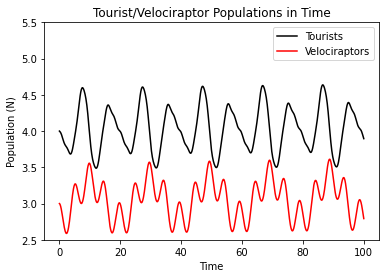

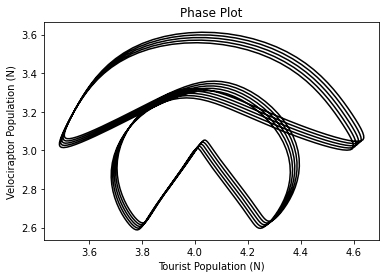

Success


In [9]:
t = numpy.linspace(0.0, 100.0, 1000)
U = solve_newton(t, numpy.array([4.0, 3.0]), tolerance=1e-3)
print(repr(U[::100]))
U_true = numpy.array([[ 4.                ,  3.                ],
                      [ 3.9134711585015927,  3.5492962949915734],
                      [ 3.9930517703869257,  2.9903348084254571],
                      [ 3.7994886843948481,  3.5222458630304252],
                      [ 3.9768706240486029,  2.9540238459613501],
                      [ 3.7073585349850822,  3.4668124684596084],
                      [ 3.9494771605525214,  2.8980683829809037],
                      [ 3.6389102010408898,  3.3924679483427114],
                      [ 3.9153001879623379,  2.8320597734640938],
                      [ 3.5902204721540936,  3.310623730889021 ]])
numpy.testing.assert_allclose(U[::100], U_true)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U[:, 0], 'k', label="Tourists")
axes.plot(t, U[:, 1], 'r', label="Velociraptors")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")
axes.set_ylim((2.5, 5.5))
axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U[:, 0], U[:, 1], 'k')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

plt.show()
print("Success")

**(g)** [4] How might you go about choosing an appropriate method for an approach to the problem?  Back up your decision with evidence.

**Answer to Question 1 (g)**

Well, we firstly need to analyze the importance of nonlinear terms of $u$ and $t$. For some problems, using linearized method is enough, but other question Newton's is better.

If we have to find a proper solution for an arbitery question without doing analysis, id rather say we guess the initial thing by linearied method and for the newton's method use backward Euler

Text(0, 0.5, 'Velociraptor Population (N)')

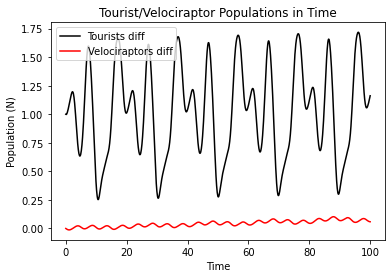

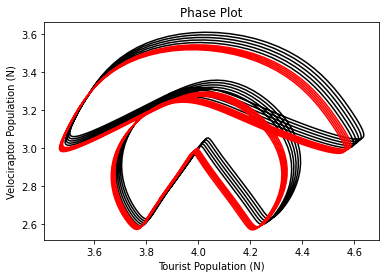

In [10]:
t = numpy.linspace(0.0, 100.0, 1000)
U_new = solve_newton(t, numpy.array([4.0, 3.0]), tolerance=1e-3)
U_scipy = solve_scipy(t, numpy.array([4.0, 3.0]))

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, U_new[:, 0]-U_scipy[:, 1], 'k', label="Tourists diff")
axes.plot(t, U_new[:, 1]-U_scipy[:, 1], 'r', label="Velociraptors diff")
axes.set_title("Tourist/Velociraptor Populations in Time")
axes.set_xlabel("Time")
axes.set_ylabel("Population (N)")

axes.legend()

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(U_new[:, 0], U_new[:, 1], 'k')
axes.plot(U_scipy[:, 0], U_scipy[:, 1], 'r')
axes.set_title("Phase Plot")
axes.set_xlabel("Tourist Population (N)")
axes.set_ylabel("Velociraptor Population (N)")

## Question 2 - Damped Linear Pendulum

Consider the following linearized model for a swinging pendulum with frictional forces included
$$
    \theta''(t) = -a \theta(t) - b \theta'(t).
$$

**(a)** [5] Write this as a system of ODEs and compute the eigenvalues of the matrix.  What do you observe if the damping is set to zero?

**Answer to Question 2 (a)**

##### Eigenvalues Calculation

We first rewrite the linearized model as a system of ODEs with $\theta''(t) = -a \theta(t) - b \theta'(t)$ by our hands.

We set $\vec{u}$ equal to something below first:

$$
\vec{u} = \begin{bmatrix} \theta \\ \theta' \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}
$$

We then find that we actually need to derive the equation of $\theta'$ if we want to write down:

$$\frac{\text{d} \vec{u}}{\text{d} t} = \frac{\text{d}}{\text{d} t} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} \theta' \\ \theta'' \end{bmatrix}
$$

We can know $\theta'(t) = -a - b\theta(t)$, which means we can have something below:
$$
\begin{bmatrix} u_1 \\u_2 \end{bmatrix}' = \begin{bmatrix} 0 & 1 \\-a & -b \end{bmatrix} \begin{bmatrix} u_1 \\u_2 \end{bmatrix}
$$

Then the eiganvalues can be calculated as below:

$$
\lambda = \frac{-b \pm \sqrt{b^2 - 4a}}{2}
$$


##### If the damping is set to zero

We can notice that the sqrts of eigenvalus will be negative which will cause imaginary values!

**(b)** [15] Implement the leapfrog, trapezoidal rule and the 2-step explicit Adams-Bashforth method AB2 to solve the ODE above.  Use forward RK2 to start the methods when applicable.

In [11]:
def solve_leapfrog(t, U_0, a, b):
    """Solve the damped linear pendulum problem using the leapfrog method
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
    # initial everything
    delta_t = t[1] - t[0]
    
    U = numpy.empty((2, t.shape[0]))
    U[:, 0] = U_0
    
    f1 = lambda t, U: U[1]
    f2 = lambda t, U: -a*U[0] - b*U[1]
    
    U[0,1] = U[0,0] + 0.5 * delta_t * f1(t[0], U[:,0])
    U[0,1] = U[0,0] + delta_t * f1(t[0] + 0.5 * delta_t, U[:,1])
    
    U[1,1] = U[1,0] + 0.5 * delta_t * f2(t[0], U[:,0])
    U[1,1] = U[1,0] + delta_t * f2(t[0] + 0.5 * delta_t, U[:,1])
    
    #apply leap-frog method
    for n in range(1, t.shape[0]-1):
        U[0,n + 1] = U[0, n - 1] + 2.0 * delta_t * f1(t[n], U[:,n])
        U[1,n + 1] = U[1, n - 1] + 2.0 * delta_t * f2(t[n], U[:,n])


    return U


def solve_trap(t, U_0, a, b):
    """Solve the damped linear pendulum problem using the trapezoidal method
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
    def f(t, U):
        """Right hand side of system."""
        answer = numpy.array([U[1], -a*U[0] - b*U[1]])
        return answer
    
    
    #initiate everything
    delta_t = t[1] - t[0]
    U = numpy.empty((t.shape[0],2))
    U[0, :] = U_0
    
    #form a diaglonalized A
    A = numpy.array([[0, 1],[-a, -b]])
    I = numpy.identity(2)
    
    #loop and calculate every step
    for n in range(0, t.shape[0] - 1):
        U[n + 1, :] = numpy.linalg.solve(I - (delta_t * 0.5 * A), U[n, :] + (delta_t * 0.5 * f(t[n], U[n, :])))
    
    return U.transpose()


def solve_AB2(t, U_0, a, b):
    """Solve the damped linear pendulum problem using 2-step Adams-Bashforth 
    
    :Input:
     - *t* (ndarray(:)) - Time points to solve the ODE at.
     - *U_0* (ndarray(2)) - Initial condition.
     - *a* (float) - Spring constant.
     - *b* (float) - Damping constant.

    :Output:
     - (ndarray(2, :)) - Solution of ODE at values *t*.
    """
        
    delta_t = t[1] - t[0]
    
    U = numpy.empty((2, t.shape[0]))
    U[:, 0] = U_0
    
    f1 = lambda t, U : U[1]
    f2 = lambda t, U: -a*U[0] - b*U[1]
    
    U[0,1] = U[0,0] + 0.5 * delta_t * f1(t[0], U[:,0])
    U[0,1] = U[0,0] + delta_t * f1(t[0] + 0.5 * delta_t, U[:,1])
    
    U[1,1] = U[1,0] + 0.5 * delta_t * f2(t[0], U[:,0])
    U[1,1] = U[1,0] + delta_t * f2(t[0] + 0.5 * delta_t, U[:,1])
    
    for n in range(0,len(t)-2):
        U[0, n+2] = U[0, n + 1] + delta_t / 2.0 * (-f1(t[n], U[:, n]) + 3.0 * f1(t[n+1], U[:, n+1]))
        U[1, n+2] = U[1, n + 1] + delta_t / 2.0 * (-f2(t[n], U[:, n]) + 3.0 * f2(t[n+1], U[:, n+1]))
    
    return U

In [12]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_leapfrog(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-2
print("Success for Leapfrog!")

Error = 0.006017862299139448
Success for Leapfrog!


In [13]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_trap(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-3
print("Success for trapezoidal method!")

Error = 0.0007622676491523
Success for trapezoidal method!


In [14]:
t = numpy.linspace(0, 5.0, 500)
a = 10
b = 1
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

# True solution
r = [0.5 * (-b + numpy.sqrt((b**2 - 4.0 * a) + 0.j)), 
     0.5 * (-b - numpy.sqrt((b**2 - 4.0 * a) + 0.j))]
C = [U_0[0] - U_0[0] / (1.0 - r[1] / r[0]), U_0[0] / (1.0 - r[1] / r[0])]
u_true = lambda t: C[0] * numpy.exp(r[0] * t) + C[1] * numpy.exp(r[1] * t)

U = solve_AB2(t, U_0, a, b)
error = numpy.linalg.norm((t[1] - t[0]) * (U[0, :] - u_true(t)), ord=1)
print("Error = %s" % error)
assert error < 1e-2
print("Success for Adams-Bashforth 2!")

Error = 0.003659204656971525
Success for Adams-Bashforth 2!


**(c)** [10] Test the leapfrog, trapezoid, and AB2 methods (all of which are second
order accurate) for each of the following cases (and perhaps others of your 
choice) and comment on the behavior of each method.  Instead of plotting $\theta$ plot the phase plane solution, i.e. plot $\theta(t)$ vs. $\theta'(t)$.  You can (and should) be careful about choosing $\Delta t$.

1. $a = 100, ~b=0$ (undamped),
1. $a = 100, ~b=3$ (damped),
1. $a = 100, ~b=10$ (more damped).

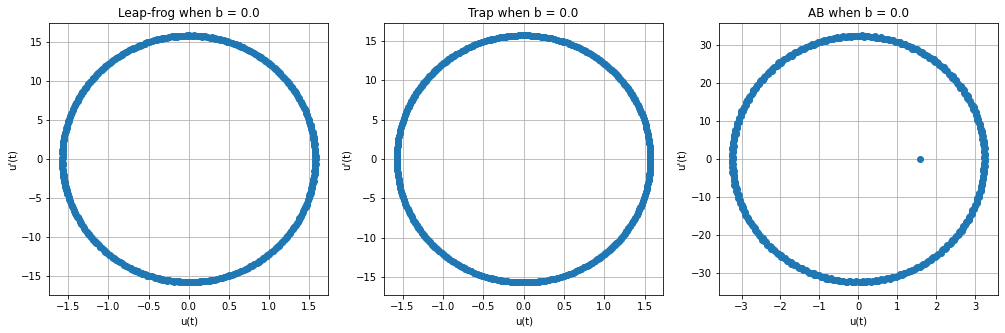

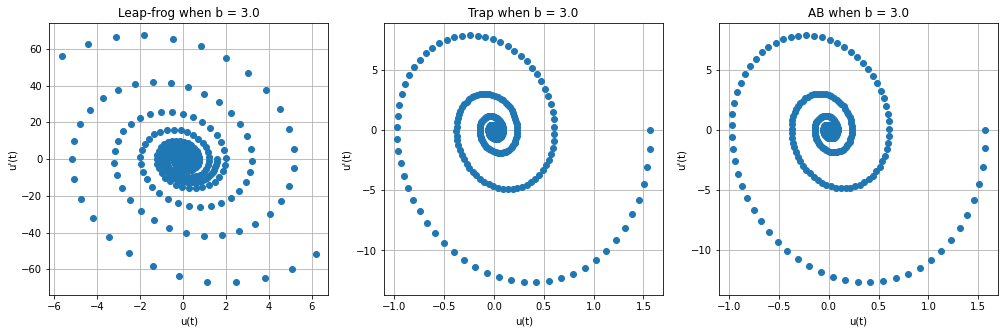

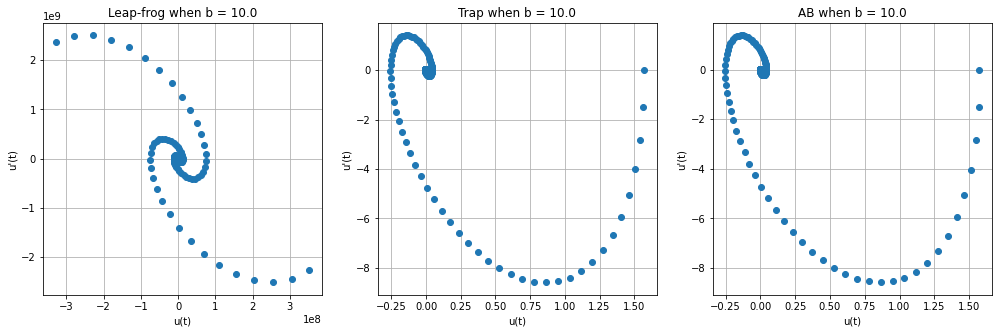

In [15]:
t = numpy.linspace(0, 5.0, 500)
U_0 = numpy.array([numpy.pi / 2.0, 0.0])

a = 100.0
b = [0.0, 3.0, 10.0]

for n in range(3):

    U_leap = solve_leapfrog(t, U_0, a, b[n])
    U_trap = solve_trap(t, U_0, a, b[n])
    U_AB2 = solve_AB2(t, U_0, a, b[n])

    fig = plt.figure(figsize=(17,5))
    axes = fig.add_subplot(1, 3, 1)
    axes.plot(U_leap[0,:], U_leap[1, :], 'o')
    axes.set_title("Leap-frog when b = {}".format(b[n]))
    axes.set_xlabel("u(t)")
    axes.set_ylabel("u'(t)")
    axes.grid()
    
    axes = fig.add_subplot(1, 3, 2)
    axes.plot(U_trap[0,:], U_trap[1, :], 'o')
    axes.set_title("Trap when b = {}".format(b[n]))
    axes.set_xlabel("u(t)")
    axes.set_ylabel("u'(t)")
    axes.grid()

    axes = fig.add_subplot(1, 3, 3)
    axes.plot(U_AB2[0,:], U_AB2[1,:], 'o')
    axes.set_title("AB when b = {}".format(b[n]))
    axes.set_xlabel("u(t)")
    axes.set_ylabel("u'(t)")
    axes.grid()

YOUR ANSWER HERE

## Question 3 - $R(z)$ for One-Step Methods

Any $r$-stage Runge-Kutta method applied to $u'=\lambda u$ will give an
expression of the form
$$
    U^{n+1} = R(z)U^n
$$
where $z=\lambda \Delta t$ and $R(z)$ is a rational function, a ratio of
polynomials in $z$ each having degree at most $r$.  For an explicit method
$R(z)$ will simply be a polynomial of degree $r$ and for an implicit method
it will be a more general rational function.

Since $u(t_{n+1}) = e^z u(t_n)$ for this problem, we expect that a $p$th
order accurate method will give a function $R(z)$ satisfying
$$
    R(z) = e^z + \mathcal{O}(z^{p+1}) \quad\text{as}~~~~z \rightarrow 0,
$$
as discussed in the Remark on page 129 of LeVeque.  The rational function $R(z)$ also
plays a role in stability analysis.

One can determine the value of $p$ in the last equation by expanding $e^z$ in a Taylor
series about $z=0$, writing the $\mathcal{O}(z^{p+1})$ term as
$$
    C z^{p+1} + \mathcal{O}(z^{p+2}),
$$
multiplying through by the denominator of $R(z)$, and then collecting terms.
For example, for the trapezoidal method
$$
    \frac{1+z/2}{1-z/2} = \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})
$$
gives
$$
    \begin{split}
        1+\frac{1}{2} z &= \left(1-\frac{1}{2} z\right)\left( 1+z+\frac{1}{2} z^2 + \frac 1 6 z^3 + \cdots\right) + Cz^{p+1} + \mathcal{O}(z^{p+2})\\
                  &= 1 + \frac{1}{2} z - \frac{1}{12} z^3 + \cdots + Cz^{p+1}  + \mathcal{O}(z^{p+2})
    \end{split}
$$
and so
$$
    Cz^{p+1} = \frac{1}{12} z^3 + \cdots,
$$
from which we conclude that $p=2$.

**(a)** [5] Let 
$$
    R(z) = \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2}.
$$
Determine $p$ for this rational function as an approximation to $e^z$.

**Answer to Question 3 (a)**

Since 

$$
    R(z) = \frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2}.
$$

We then do the calculation below:

$$
\begin{aligned}
R(z) &= e^z + \mathcal{O}(z^{p+1}) \quad\text{as}~~~~z \rightarrow 0\\
\frac{1 + \frac 1 3 z}{1 - \frac 2 3 z + \frac 1 6 z^2} &= e^z + \mathcal{O}(z^{p+1})\\
&= \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1}+ \mathcal{O}(z^{p+1})
\end{aligned}
$$

We then move the demoninator from LHS to RHS and get:
$$
\begin{aligned}
1 + \frac 1 3 z &= 1 + \frac{1}{3}z - \frac{1}{36}z^4 + \frac{1}{36}z^5 +... + Cz^{p+1}+ \mathcal{O}(z^{p+1})\\
\frac{1}{36}z^4 + ... &= Cz^{p+1}+ \mathcal{O}(z^{p+1})\\
p &= 3
\end{aligned}
$$

**(b)** [5] Determine $R(z)$ and $p$ for the backward Euler method.

**Answer to Question 3 (b)**

Since we know that Backward Euler method is:
$$
U^{n+1} = U^n + \Delta t f(t_{n+1}, U^{n+1})
$$

Also, as for the absolute stability of the backward Euler Method, we can find something below:

$$
\begin{aligned}
0 &= U_{n+1} (1 - \Delta t \lambda) - U_n \\
&= \xi (1 - z) - 1\\
\xi &= \frac{1}{1-z}
\end{aligned}
$$

Then we can set $R(z)$ equal to $\frac{1}{1-z}$:

$$
\begin{aligned}
R(z) = \frac{1}{1 - z} &= \left(1+z+\frac 1 2 z^2 + \frac 1 6 z^3 + \cdots\right) +Cz^{p+1} + \mathcal{O}(z^{p+2})\\
1 &= -\frac{1}{6} (z-1)(6+6z+3z^2+z^3 + \cdots) + Cz^{p+1} + \mathcal{O}(z^{p+2})\\
 \frac{1}{6}\left(3z^2 + 2z^3 + z^4 + \cdots \right) &= Cz^{p+1} + \mathcal{O}(z^{p+2})\\
 p&=1
\end{aligned}
$$

**(c)** [10] Determine  $R(z)$ and $p$ for the TR-BDF2 given by
$$\begin{aligned}
    U^\ast &= U^n + \frac{\Delta t}{4} (f(U^n) + f(U^\ast)) \\
    U^{n+1} &= \frac{1}{3} (4 U^\ast - U^n + \Delta t f(U^{n+1})).
\end{aligned}$$
The name is comes from using a modified trapezoidal rule as the first stage and a two-step backwards difference formula for the second.

**Answer to Question 3 (c)**

We firstly can write TR-BDF2 as below:

$$
\begin{aligned}
\text{Step 0} = Y_1 &= U^n\\
\text{Step 1}= Y_2 = U^\ast &= U^n + \frac{\Delta t}{4}(f(t_n, U^n)+f(t_n + \frac{\Delta t}{2}, U^\ast))\\
\text{Step 2}= Y_3 = U^{n+1} &= \frac{1}{3} \left(4 ( U^n + \frac{\Delta t}{4}(f(t_n, U^n)+f(t_n + \frac{\Delta t}{2}, U^\ast))) - U^n + \Delta t f(t_n + \Delta, U^{n+1})\right)\\
&= U^n + \frac{\Delta t}{3}[f(Y_1, t_n), f(Y_2, t_n + \frac{\Delta t}{2}) + f(t_n + \Delta t, Y_3)]
\end{aligned}
$$

We then can know $R(z)$ by doing the calculation, and I got something below:

$$
R(z)= \frac{1 + \frac{5}{12}z}{1 - \frac{7}{12}z + \frac{1}{12}z^2}
$$

After, substitute $R(z)$ into the function below in the question and got $p = 2$ 


**(d)** [] Plot all of the above absolute stability regions.  Make sure to determine which denotes the interior and exterior of the region.

In [16]:
# got these 2 from 4300 notes since im also taking that course this semester

def stability_plot(X, Y, C, axes, title=None, continuous=True):
    
    if  continuous:
        Ch = C
    else:
        Ch = numpy.heaviside(C-1,0.)
    pcolor_plot = axes.pcolor(X, Y, Ch, vmin=0, vmax=1, cmap=plt.get_cmap('Greens_r'), shading='auto')
    axes.contour(X, Y, C, 'k', levels=[1.0])
    fig = plt.gcf()
    fig.colorbar(pcolor_plot)
    axes.plot(x, numpy.zeros(x.shape),'k--')
    axes.plot(numpy.zeros(y.shape), y,'k--')
    
    axes.set_xlabel('Re', fontsize=16)
    axes.set_ylabel('Im', fontsize=16)
    if title is not None:
        axes.set_title(title, fontsize=16)
    
    axes.set_aspect('equal')  
    
def plot_stability_ssms(R, x, y, axes=None, title=None, continuous=True):
    
    X,Y = numpy.meshgrid(x,y)
    Z = X + 1j * Y
    if axes is None:
        fig = plt.figure(figsize=(8,6))
        axes = fig.add_subplot(1,1,1)
    
    abs_R = numpy.abs(R(Z))
    stability_plot(X, Y, abs_R, axes, title, continuous)

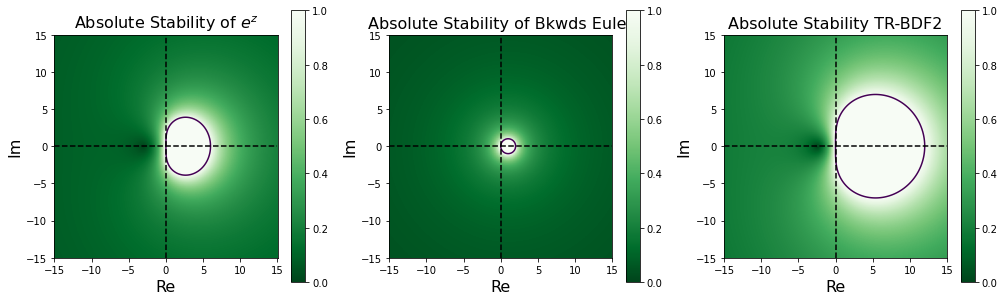

In [17]:
x = numpy.linspace(-15,15,1000)
y = numpy.linspace(-15,15,1000)

e_z = lambda z: (1 + z/3)/(1 - 2*z/3 + z**2 / 6)
back_euler = lambda z: 1/(1-z)
tr_bdf2 = lambda z: (1 + (5*z)/12) / (1 - (7*z)/12 + (z**2 / 12))

fig = plt.figure(figsize=(17,5))

axes = fig.add_subplot(1,3,1)
plot_stability_ssms(e_z, x, y, axes=axes, title='Absolute Stability of $e^z$')

axes = fig.add_subplot(1,3,2)
plot_stability_ssms(back_euler, x, y, axes=axes, title='Absolute Stability of Bkwds Euler')

axes = fig.add_subplot(1,3,3)
plot_stability_ssms(tr_bdf2, x, y, axes=axes, title='Absolute Stability TR-BDF2')

We actually can modify the domain by changing the x and y if we want to have a close look at the Absolute Stability of backwards Euler!